In [235]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as pt
from sklearn import metrics
import json
pd.set_option('display.max_columns', 20)
pd.set_option('display.max_rows', 20)
pd.set_option('display.max_colwidth', -1)

In [236]:
import pickle
df = pd.read_pickle("projectData/authorExperienceLinesMatrix.p")
df = pd.DataFrame(df, columns=['author', 'commit', 'linesAdded'])
df=df.sort_index(axis=0 ,ascending=False)
df= df.reset_index(drop=True)

In [237]:
commits = df.commit
commits = commits.apply(lambda x: x[:-1])
df.commit = commits
df.linesAdded = df.linesAdded.transform(lambda x:int(x))
df[['linesSum']]= pd.DataFrame(df.groupby('author')['linesAdded'].cumsum())

experienceCommits = df
experienceCommits.head()

,author,commit,linesAdded,linesSum
0,Owen O'Malley,5128a9a453d64bfe1ed978cf9ffed27985eeef36,67543,67543
1,Owen O'Malley,c94ff0f240de583311c1bd73cf41d113ade75ebf,13948,81491
2,Owen O'Malley,abe7be913432053f6d419ea4ca4f9cd2be938bc7,319738,401229
3,Owen O'Malley,cab0a4bf543f58600ae8499f5b219a452f89c827,29719,430948
4,Owen O'Malley,c967cef4d3b82bf05f09ff03ff50243e0a81db26,78824,509772


In [238]:
df = pd.read_pickle("projectData/defectAuthorMatrix.p")
dF = pd.DataFrame(df, columns= ["parentCommit", "file", "lineNumber", "author", "implicated"])

In [239]:
hadoop1000Matrix = pd.read_pickle("projectData/defectAuthorMatrixForHADOOP1000.p")
hadoop1000 = pd.DataFrame(hadoop1000Matrix, columns= ["parentCommit", "file", "lineNumber", "author", "implicated"])

In [240]:
hadoop2000Matrix = pd.read_pickle("projectData/defectAuthorMatrixForHADOOP2000.p")
hadoop2000 = pd.DataFrame(hadoop1000Matrix, columns= ["parentCommit", "file", "lineNumber", "author", "implicated"])

In [241]:
hdfsMatrix = pd.read_pickle("projectData/defectAuthorMatrixForHDFS.p")
hdfs = pd.DataFrame(hdfsMatrix, columns= ["parentCommit", "file", "lineNumber", "author", "implicated"])

In [242]:
hdfs2000Matrix = pd.read_pickle("projectData/defectAuthorMatrixForHDFS2000.p")
hdfs2000 = pd.DataFrame(hdfs2000Matrix, columns= ["parentCommit", "file", "lineNumber", "author", "implicated"])

In [243]:
hdfs1000Matrix = pd.read_pickle("projectData/defectAuthorMatrixForHDFS1000.p")
hdfs1000 = pd.DataFrame(hdfs1000Matrix, columns= ["parentCommit", "file", "lineNumber", "author", "implicated"])

In [244]:
yarnMatrix = pd.read_pickle("projectData/defectAuthorMatrixForYARN.p")
yarn = pd.DataFrame(yarnMatrix, columns= ["parentCommit", "file", "lineNumber", "author", "implicated"])

In [245]:
yarn1000Matrix = pd.read_pickle("projectData/defectAuthorMatrixForYARN1000.p")
yarn1000 = pd.DataFrame(yarn1000Matrix, columns= ["parentCommit", "file", "lineNumber", "author", "implicated"])

In [246]:
mapreduceMatrix = pd.read_pickle("projectData/defectAuthorMatrixForMAPREDUCE.p")
mapreduce = pd.DataFrame(mapreduceMatrix, columns= ["parentCommit", "file", "lineNumber", "author", "implicated"])

In [247]:
mapreduce1000Matrix = pd.read_pickle("projectData/defectAuthorMatrixForMAPREDUCE1000.p")
mapreduce1000 = pd.DataFrame(mapreduce1000Matrix, columns= ["parentCommit", "file", "lineNumber", "author", "implicated"])

In [248]:
# dF=pd.concat([dF, hadoop1000, hdfs, hdfs2000, hdfs1000, yarn, yarn1000, mapreduce, mapreduce1000])

In [368]:
dF=pd.concat([hdfs2000, hdfs1000])

In [358]:
dF

,parentCommit,file,lineNumber,author,implicated
0,0e7c88347e1c0b558866160d8c75d3b8ad3e6e1b,hadoop-hdfs-project/hadoop-hdfs/src/test/java/org/apache/hadoop/hdfs/TestDFSInotifyEventInputStream.java,167,Andrew Wang,958c9b5080d584c2e60fa2e1a041e5dc5f7498eb
1,0e7c88347e1c0b558866160d8c75d3b8ad3e6e1b,hadoop-hdfs-project/hadoop-hdfs/src/test/java/org/apache/hadoop/hdfs/TestDFSInotifyEventInputStream.java,381,Colin Patrick Mccabe,1f01d8347a57bb95936f6d1fa5dc33b20239d6b2
2,2a014955448be279568842a68e3c36b847882609,hadoop-hdfs-project/hadoop-hdfs/src/main/java/org/apache/hadoop/hdfs/server/blockmanagement/BlockManager.java,3588,Jing Zhao,bed74b620ad08180e446cc6df52fe7b360c6224a
3,2a014955448be279568842a68e3c36b847882609,hadoop-hdfs-project/hadoop-hdfs/src/main/java/org/apache/hadoop/hdfs/server/blockmanagement/BlockManager.java,3589,Jing Zhao,bed74b620ad08180e446cc6df52fe7b360c6224a
4,6fe2e7c3f398b53f78ebedec55bab4bb06c5b72b,hadoop-hdfs-project/hadoop-hdfs/src/test/java/org/apache/hadoop/hdfs/server/namenode/TestFileTruncate.java,65,Plamen Jeliazkov,6ff9bde71413686bb0dfe7f0f910e33d0a4f9474
5,6fe2e7c3f398b53f78ebedec55bab4bb06c5b72b,hadoop-hdfs-project/hadoop-hdfs/src/test/java/org/apache/hadoop/hdfs/server/namenode/TestFileTruncate.java,67,Plamen Jeliazkov,6ff9bde71413686bb0dfe7f0f910e33d0a4f9474
6,6fe2e7c3f398b53f78ebedec55bab4bb06c5b72b,hadoop-hdfs-project/hadoop-hdfs/src/test/java/org/apache/hadoop/hdfs/server/namenode/TestFileTruncate.java,93,Plamen Jeliazkov,6ff9bde71413686bb0dfe7f0f910e33d0a4f9474
7,6fe2e7c3f398b53f78ebedec55bab4bb06c5b72b,hadoop-hdfs-project/hadoop-hdfs/src/test/java/org/apache/hadoop/hdfs/server/namenode/TestFileTruncate.java,94,Plamen Jeliazkov,6ff9bde71413686bb0dfe7f0f910e33d0a4f9474
8,6fe2e7c3f398b53f78ebedec55bab4bb06c5b72b,hadoop-hdfs-project/hadoop-hdfs/src/test/java/org/apache/hadoop/hdfs/server/namenode/TestFileTruncate.java,110,Plamen Jeliazkov,6ff9bde71413686bb0dfe7f0f910e33d0a4f9474
9,6fe2e7c3f398b53f78ebedec55bab4bb06c5b72b,hadoop-hdfs-project/hadoop-hdfs/src/test/java/org/apache/hadoop/hdfs/server/namenode/TestFileTruncate.java,111,Plamen Jeliazkov,6ff9bde71413686bb0dfe7f0f910e33d0a4f9474


In [344]:
dF=dF.sort_index(axis=0 ,ascending=False)
dF= dF.reset_index(drop=True)
dF.head()

,parentCommit,file,lineNumber,author,implicated
0,12f83b380a9bf55f793cc166f495ff543296e1dc,hadoop-hdfs-project/hadoop-hdfs/src/test/java/org/apache/hadoop/hdfs/server/namenode/TestEditLog.java,295,Todd Lipcon,28e6a4e44a3e920dcaf858f9a74a6358226b3a63
1,12f83b380a9bf55f793cc166f495ff543296e1dc,hadoop-hdfs-project/hadoop-hdfs/src/test/java/org/apache/hadoop/hdfs/server/namenode/TestEditLog.java,291,Todd Lipcon,a196766ea07775f18ded69bd9e8d239f8cfd3ccc
2,12f83b380a9bf55f793cc166f495ff543296e1dc,hadoop-hdfs-project/hadoop-hdfs/src/test/java/org/apache/hadoop/hdfs/server/namenode/TestEditLog.java,278,Todd Lipcon,a196766ea07775f18ded69bd9e8d239f8cfd3ccc
3,12f83b380a9bf55f793cc166f495ff543296e1dc,hadoop-hdfs-project/hadoop-hdfs/src/test/java/org/apache/hadoop/hdfs/server/namenode/TestEditLog.java,130,Todd Lipcon,a196766ea07775f18ded69bd9e8d239f8cfd3ccc
4,12f83b380a9bf55f793cc166f495ff543296e1dc,hadoop-hdfs-project/hadoop-hdfs/src/test/java/org/apache/hadoop/hdfs/server/namenode/TestEditLog.java,129,Todd Lipcon,a196766ea07775f18ded69bd9e8d239f8cfd3ccc


In [369]:
authorImplicatedLines= dF['author'].nunique()
# authorImplicatedLines.sum()
authorImplicatedLines

36

In [252]:
implicatedLines= dF.groupby('implicated')['author'].count()
implicatedLines.head()
# implicatedLines[implicatedLines.index == '3de3640e4c1172f1e47565ac61a1f3183c354c79']
# # dF[dF.author=='Aaron T. Myers']
# try:
#     print(implicatedLines[implicatedLines.index=='004068c3911ab2738c8e5d00b49d4b69cd42c603'][0])
# except IndexError:
#     print("no key")

implicated
004068c3911ab2738c8e5d00b49d4b69cd42c603    8 
00a7ebab223f2d3f566c2a431b8fc39eadfb643b    17
016c794e75be975078a5b422e79720bbc1044028    1 
01acf3a3af5727bfdc0a37f9caf4cf8e1be89224    7 
01ecec1cd299aeef60fd6a90fccc6ab48e689237    1 
Name: author, dtype: int64

In [253]:
implicatedList = dF['implicated'].tolist()
print(len(implicatedList))
tempList=[]
commits=experienceCommits['commit'].tolist()
print(len(commits))
for x in commits:
    if x in implicatedList:
        tempList.append([x, True])  
    else:
        tempList.append([x, False])  
        
print(len(tempList))
s=pd.DataFrame(tempList, columns=['commit', 'buggy'])
experienceCommits[['buggy']]=pd.DataFrame(s['buggy'])
experienceCommits['buggy'] = experienceCommits.buggy.astype(int)
# experienceCommits['buggLines']=0 
experienceCommits[experienceCommits['buggy']==1] 

7363
9662
9662


,author,commit,linesAdded,linesSum,buggy
0,Owen O'Malley,5128a9a453d64bfe1ed978cf9ffed27985eeef36,67543,67543,1
6,Giridharan Kesavan,ac670cc47f06b0eb880dcb5522a5aba187b5c67d,13605,13605,1
30,Tsz-wo Sze,a13237975d02b3db913b95845d4b8d6d22f2bac7,98,103,1
90,Christopher Douglas,f95ec3f5bf12bee07c90943cff3b135e6a7e7a8b,30,10937,1
95,Suresh Srinivas,cdbb724edbe093a02d4e2c24523001dcdff0ffd5,387,521,1
149,Suresh Srinivas,3f371a0a644181b204111ee4e12c995fc7b5e5f5,2381,8137,1
168,Konstantin Boudnik,929e91a08c5387c692ed3257361190b83d72f2e9,31,561,1
189,Boris Shkolnik,ae93ba7501d95e9d26a29de25f4cc39e5225ca20,425,425,1
190,Devaraj Das,fe479755c39b8259e0564de7a35389721351c76b,384,812,1
219,Hairong Kuang,d6f4cf3dfec03867f02bf71aa900a77676651c2a,4,227,1


In [254]:
tempList=[]
for x in commits:
    try:
        tempList.append(implicatedLines[implicatedLines.index==x][0])
    except IndexError:
        tempList.append(0)

In [255]:
tempList
s=pd.DataFrame(tempList, columns=['buggyLines'])
experienceCommits[['buggyLines']]=pd.DataFrame(s['buggyLines'])
experienceCommits[experienceCommits.author =='Aaron T. Myers']

experienceCommits[['buggyLinesSum']]= pd.DataFrame(experienceCommits.groupby('author')['buggyLines'].cumsum())
experienceCommits[experienceCommits.author =='Aaron T. Myers']
        

,author,commit,linesAdded,linesSum,buggy,buggyLines,buggyLinesSum
6998,Aaron T. Myers,135315b66fba5d248a983ad5d05d7ab7da42b5fb,245,245,0,0,0
7109,Aaron T. Myers,a0c54aeb00c0bc38f7dfa3615ce6866023d1ef74,2550,2795,0,0,0
7159,Aaron T. Myers,71e6a4a735222c25bd0be7f6811863613ece3114,4,2799,0,0,0
7351,Aaron T. Myers,afaadd65359ba54be38a118bfb5dcf4174416a27,52,2851,0,0,0
7365,Aaron T. Myers,8cbacb37e9d4aa1a7dcc87a7aef7915ef72a1be6,10,2861,0,0,0
7392,Aaron T. Myers,f3132eee1011b750158169c099b26ce8f6e2d1f4,155,3016,0,0,0
7638,Aaron T. Myers,9082fe4e206692695ae877d27c19cac87f6481dc,1262,4278,0,0,0
7639,Aaron T. Myers,e96f0c6aae7dffc2079ffd6ff863433e96724670,142,4420,0,0,0
7641,Aaron T. Myers,d698ed1d6f641a7377c1600ebe7a33757936a2b1,49,4469,0,0,0
7743,Aaron T. Myers,d35eba7b1ff98e2e542a6c6c5b389fcc20d885c7,331,4800,0,0,0


/Users/faizank/workspace/jupyter/lib/python3.7/site-packages/matplotlib/figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


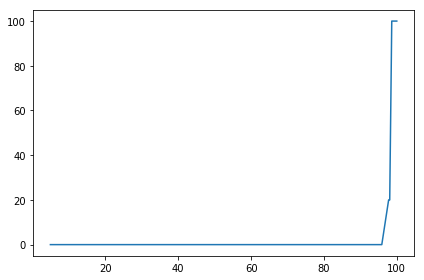

In [256]:
currentMatrix = experienceCommits[experienceCommits.author =='Aaron T. Myers']
maxLineSum = currentMatrix.linesSum.max()
maxLineSum
xSeries = currentMatrix.linesSum*100/maxLineSum
xSeries

maxBuggySum = currentMatrix.buggyLinesSum.max()
maxBuggySum
ySeries = currentMatrix.buggyLinesSum*100/maxBuggySum
ySeries


pt.plot(xSeries, ySeries)

In [257]:
data= dF.groupby('author')['implicated'].nunique()
authorDf = pd.DataFrame(data)
topBugyContributers= authorDf.implicated.nlargest(10)

/Users/faizank/workspace/jupyter/lib/python3.7/site-packages/matplotlib/figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "
/Users/faizank/workspace/jupyter/lib/python3.7/site-packages/matplotlib/figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


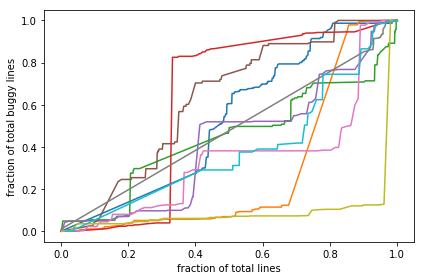

In [328]:

tempBuggy=[]
aucValues=[]
for author in topBugyContributers.index:
    currentMatrix = experienceCommits[experienceCommits.author ==author]
    maxLineSum = currentMatrix.linesSum.max()
    maxLineSum
    xSeries = currentMatrix.linesSum/maxLineSum
    

    maxBuggySum = currentMatrix.buggyLinesSum.max()
    maxBuggySum
    ySeries = currentMatrix.buggyLinesSum/maxBuggySum
    
    
    pt.plot(xSeries, ySeries, label= str(author))
#     pt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    
    aucValues.append(metrics.auc(xSeries, ySeries))

    
pt.xlabel("fraction of total lines")
pt.ylabel("fraction of total buggy lines")
pt.savefig('buggyLines.png', bbox_inches="tight")
# pt.hist(aucValues)
# Not plotting the non buggy commits, only the buggy commits, which is why this is a smooth curve. 
# I am filtering the experience matrix first based on the buggyiness. 

Text(0.5, 1.0, 'author with most bugs, bugs vs experience')

/Users/faizank/workspace/jupyter/lib/python3.7/site-packages/matplotlib/figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


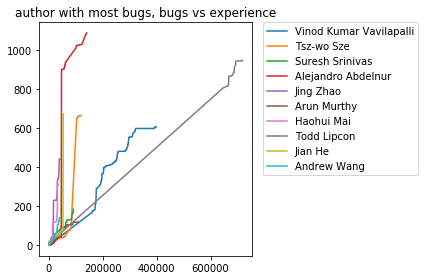

In [259]:
for author in topBugyContributers.index:
    currentMatrix = experienceCommits[experienceCommits.author ==author]
    maxLineSum = currentMatrix.linesSum.max()
    maxLineSum
    xSeries= currentMatrix.linesSum

    maxBuggySum = currentMatrix.buggyLinesSum.max()
    maxBuggySum
    ySeries=currentMatrix.buggyLinesSum
    
    pt.plot(xSeries, ySeries, label= str(author))
    pt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    
pt.title("author with most bugs, bugs vs experience")

In [260]:
topContributors= experienceCommits.groupby('author')['commit']
topContributors=topContributors.nunique().nlargest(5)
topContributors
# topContributors.columns=['somethingelse']
# topContributors
# tempBuggy= dF.loc[dF['author'].isin(topContributors.index)]
# tempBuggy.groupby('author')['implicated'].nunique().nsmallest(2)


author
Vinod Kumar Vavilapalli    752
Tsz-wo Sze                 530
Alejandro Abdelnur         426
Eli Collins                394
Arun Murthy                380
Name: commit, dtype: int64

/Users/faizank/workspace/jupyter/lib/python3.7/site-packages/matplotlib/figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


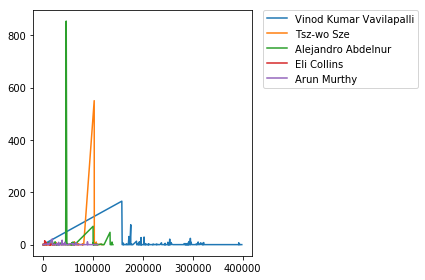

In [261]:
# currentMatrix = experienceCommits[experienceCommits.author =="Aaron T. Myers"]
# maxLineSum = currentMatrix.linesSum.max()
# maxLineSum
# xSeries = currentMatrix.linesSum

# maxBuggySum = currentMatrix.buggyLinesSum.max()
# maxBuggySum
# ySeries = currentMatrix.buggyLines

# pt.scatter(xSeries, ySeries, label= str(author))
# pt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

for author in topContributors.index:
    currentMatrix = experienceCommits[experienceCommits.author ==author]
    maxLineSum = currentMatrix.linesSum.max()
    maxLineSum
    xSeries = currentMatrix.linesSum

    maxBuggySum = currentMatrix.buggyLinesSum.max()
    maxBuggySum
    ySeries = currentMatrix.buggyLines
    
    pt.plot(xSeries, ySeries, label= str(author))
    pt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    
# pt.title("cummulativeSum vs buggyLines")

Text(0.5, 1.0, 'author with most experience and their bug percentage')

/Users/faizank/workspace/jupyter/lib/python3.7/site-packages/matplotlib/figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


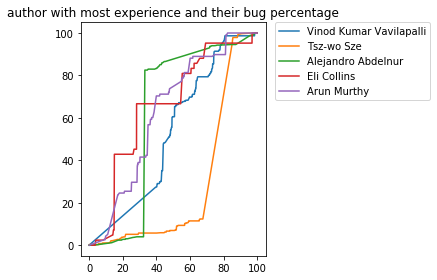

In [262]:
for author in topContributors.index:
    currentMatrix = experienceCommits[experienceCommits.author ==author]
    maxLineSum = currentMatrix.linesSum.max()
    maxLineSum
    xSeries = currentMatrix.linesSum*100/maxLineSum
    xSeries

    maxBuggySum = currentMatrix.buggyLinesSum.max()
    maxBuggySum
    ySeries = currentMatrix.buggyLinesSum*100/maxBuggySum
    ySeries
    
    pt.plot(xSeries, ySeries, label= str(author))
    pt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    
pt.title("author with most experience and their bug percentage")

In [263]:
topContributors= experienceCommits.groupby('author')['commit']
topContributors=topContributors.nunique().nlargest(10)
topContributors.columns=['somethingelse']
topContributors
tempBuggy= dF.loc[dF['author'].isin(topContributors.index)]
bottomBuggyContributor = tempBuggy.groupby('author')['implicated'].nunique().nsmallest(5)
bottomBuggyContributor

author
Robert Joseph Evans    10
Aaron Myers            11
Eli Collins            12
Todd Lipcon            23
Haohui Mai             28
Name: implicated, dtype: int64

0.3096685875064254
0.7977360786656544
0.6544462381651508
0.48053537213831543
0.3415019796031156


Text(0.5, 1.0, 'author with most experience and least bugs and their bug percentage')

/Users/faizank/workspace/jupyter/lib/python3.7/site-packages/matplotlib/figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


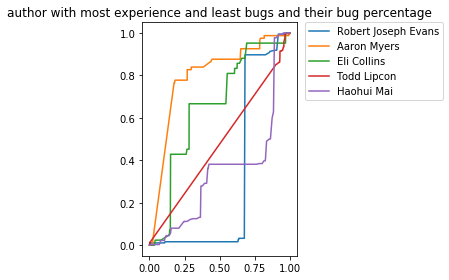

In [264]:
for author in bottomBuggyContributor.index:
    currentMatrix = experienceCommits[experienceCommits.author ==author]
    maxLineSum = currentMatrix.linesSum.max()
    maxLineSum
    xSeries = currentMatrix.linesSum/maxLineSum
    xSeries

    maxBuggySum = currentMatrix.buggyLinesSum.max()
    maxBuggySum
    ySeries = currentMatrix.buggyLinesSum/maxBuggySum
    ySeries
    
    pt.plot(xSeries, ySeries, label= str(author))
    pt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    
    print(metrics.auc(xSeries, ySeries))
    
pt.title("author with most experience and least bugs and their bug percentage")

In [265]:
data= dF.groupby('author')['implicated'].nunique()
authorDf = pd.DataFrame(data)
bottomBugyContributers= authorDf.implicated.nsmallest(5)

Text(0.5, 1.0, 'author with most experience and least bugs and their bug percentage')

/Users/faizank/workspace/jupyter/lib/python3.7/site-packages/matplotlib/figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


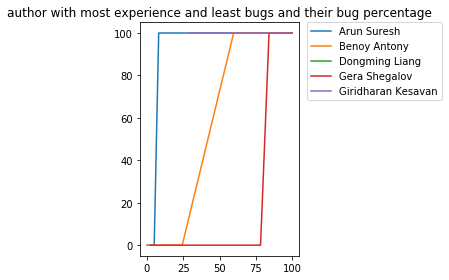

In [266]:
for author in bottomBugyContributers.index:
    currentMatrix = experienceCommits[experienceCommits.author ==author]
    maxLineSum = currentMatrix.linesSum.max()
    maxLineSum
    xSeries = currentMatrix.linesSum*100/maxLineSum
    xSeries

    maxBuggySum = currentMatrix.buggyLinesSum.max()
    maxBuggySum
    ySeries = currentMatrix.buggyLinesSum*100/maxBuggySum
    ySeries
    
    pt.plot(xSeries, ySeries, label= str(author))
    pt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    
pt.title("author with most experience and least bugs and their bug percentage")

71
8458    1.0
Name: linesSum, dtype: float64 8458    1.0
Name: buggyLinesSum, dtype: float64 Dongming Liang


/Users/faizank/workspace/jupyter/lib/python3.7/site-packages/matplotlib/figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "
/Users/faizank/workspace/jupyter/lib/python3.7/site-packages/matplotlib/figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


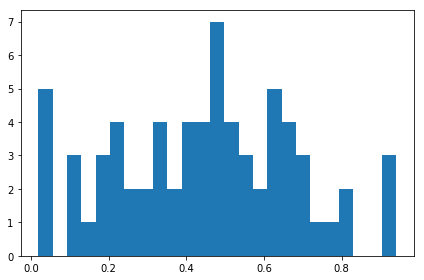

In [267]:
aucValues = {}
data= dF.groupby('author')['implicated'].nunique()
authorDf = pd.DataFrame(data)
print(len(authorDf.index))
for author in authorDf.index[:-1]:
    currentMatrix = experienceCommits[experienceCommits.author ==author]
    maxLineSum = currentMatrix.linesSum.max()
    maxLineSum
    xSeries = currentMatrix.linesSum/maxLineSum
    

    maxBuggySum = currentMatrix.buggyLinesSum.max()
    maxBuggySum
    ySeries = currentMatrix.buggyLinesSum/maxBuggySum
    
    try:
        aucValue = metrics.auc(xSeries, ySeries)
        aucValues[author]=aucValue
    except ValueError:
        print(xSeries, ySeries, author)
        


# pt.title("author with most bugs, bugs/exp")

pt.hist(aucValues.values(), bins=25)

pt.savefig('histOfAuc.png', bbox_inches="tight")
# experienceCommits.groupby('author').groups.keys()

In [268]:
# implicatedList = dF['implicated'].tolist()
# print(len(implicatedList))
# tempList=[]
# commits=experienceCommits['commit'].tolist()
# print(len(commits))
# for x in commits:
#     if x in implicatedList:
#         tempList.append([x, True])  
#     else:
#         tempList.append([x, False])  
        
# print(len(tempList))
# s=pd.DataFrame(tempList, columns=['commit', 'buggy'])
# experienceCommits[['buggy']]=pd.DataFrame(s['buggy'])
# experienceCommits['buggy'] = experienceCommits.buggy.astype(int)
# # experienceCommits['buggLines']=0 
# experienceCommits[experienceCommits['buggy']==1] 
experienceCommits['aucValue']=0
authorsWithAucValue = list(aucValues.keys())

aucDf = []
for i, row in experienceCommits.iterrows():
    if row.author in authorsWithAucValue:
        aucDf.append(aucValues[row.author])
    else:
        aucDf.append(0)

print(aucDf)


[0.7036539070891297, 0.7036539070891297, 0.7036539070891297, 0.7036539070891297, 0.7036539070891297, 0.7036539070891297, 0.7110422020686873, 0.7110422020686873, 0.7110422020686873, 0.7110422020686873, 0.7110422020686873, 0.7110422020686873, 0.7036539070891297, 0.7110422020686873, 0.7036539070891297, 0.7036539070891297, 0.7036539070891297, 0.7036539070891297, 0.7036539070891297, 0.7036539070891297, 0.7036539070891297, 0.2795316496163683, 0.03307013382602616, 0.32122590616160734, 0.17247386759581884, 0.03307013382602616, 0.01903905996075646, 0.32122590616160734, 0.01903905996075646, 0.01903905996075646, 0.2795316496163683, 0.2795316496163683, 0, 0.7110422020686873, 0.2795316496163683, 0.4479491031168394, 0.7110422020686873, 0.7036539070891297, 0, 0.2795316496163683, 0.32122590616160734, 0.2795316496163683, 0.32122590616160734, 0.2795316496163683, 0.03307013382602616, 0.2795316496163683, 0.7110422020686873, 0.32122590616160734, 0, 0, 0, 0, 0.7110422020686873, 0.2795316496163683, 0.2795316

In [269]:
experienceCommits.aucValue = pd.Series(aucDf)

# experienceCommits.groupby('author').nlargest('aucValue',5)
# s=pd.DataFrame(aucDf, columns=['commit', 'buggy'])
# experienceCommits[['buggy']]=pd.DataFrame(s['buggy'])
# experienceCommits['buggy'] = experienceCommits.buggy.astype(int)
# # experienceCommits['buggLines']=0 
# experienceCommits[experienceCommits['buggy']==1] 

In [270]:
print(aucValues.items())
experienceCommits[experienceCommits.author =='Aaron T. Myers']


dict_items([('Aaron Myers', 0.7977360786656544), ('Aaron T. Myers', 0.019616460247702763), ('Akira Ajisaka', 0.48215672835275303), ('Alejandro Abdelnur', 0.6196662411929605), ('Allen Wittenauer', 0.2179793590439978), ('Andrew Wang', 0.3858506304078235), ('Arpit Agarwal', 0.3158925943959749), ('Arun Murthy', 0.6254367845036319), ('Arun Suresh', 0.9341909023117076), ('Benoy Antony', 0.5799484203739523), ('Bikas Saha', 0.6452406947890819), ('Boris Shkolnik', 0.9128863636363634), ('Brandon Li', 0.6624844923277832), ('Chris Nauroth', 0.642773620414787), ('Christopher Douglas', 0.32122590616160734), ('Colin McCabe', 0.20526625935220585), ('Colin Patrick Mccabe', 0.2580502801606585), ('Daryn Sharp', 0.4631009815338546), ('Devaraj Das', 0.7972074817422372), ('Eli Collins', 0.6544462381651508), ('Gera Shegalov', 0.1886212198872373), ('Giridharan Kesavan', 0.7110422020686873), ('Hairong Kuang', 0.9406489053020312), ('Haohui Mai', 0.3415019796031156), ('Harsh J', 0.12676151761517612), ('Hemanth Y

,author,commit,linesAdded,linesSum,buggy,buggyLines,buggyLinesSum,aucValue
6998,Aaron T. Myers,135315b66fba5d248a983ad5d05d7ab7da42b5fb,245,245,0,0,0,0.019616
7109,Aaron T. Myers,a0c54aeb00c0bc38f7dfa3615ce6866023d1ef74,2550,2795,0,0,0,0.019616
7159,Aaron T. Myers,71e6a4a735222c25bd0be7f6811863613ece3114,4,2799,0,0,0,0.019616
7351,Aaron T. Myers,afaadd65359ba54be38a118bfb5dcf4174416a27,52,2851,0,0,0,0.019616
7365,Aaron T. Myers,8cbacb37e9d4aa1a7dcc87a7aef7915ef72a1be6,10,2861,0,0,0,0.019616
7392,Aaron T. Myers,f3132eee1011b750158169c099b26ce8f6e2d1f4,155,3016,0,0,0,0.019616
7638,Aaron T. Myers,9082fe4e206692695ae877d27c19cac87f6481dc,1262,4278,0,0,0,0.019616
7639,Aaron T. Myers,e96f0c6aae7dffc2079ffd6ff863433e96724670,142,4420,0,0,0,0.019616
7641,Aaron T. Myers,d698ed1d6f641a7377c1600ebe7a33757936a2b1,49,4469,0,0,0,0.019616
7743,Aaron T. Myers,d35eba7b1ff98e2e542a6c6c5b389fcc20d885c7,331,4800,0,0,0,0.019616


In [271]:
nonZero= experienceCommits[experienceCommits.aucValue!=0.0]
# nonZero[nonZero.aucValue<0.01]
nonZero

,author,commit,linesAdded,linesSum,buggy,buggyLines,buggyLinesSum,aucValue
0,Owen O'Malley,5128a9a453d64bfe1ed978cf9ffed27985eeef36,67543,67543,1,79,79,0.703654
1,Owen O'Malley,c94ff0f240de583311c1bd73cf41d113ade75ebf,13948,81491,0,0,79,0.703654
2,Owen O'Malley,abe7be913432053f6d419ea4ca4f9cd2be938bc7,319738,401229,0,0,79,0.703654
3,Owen O'Malley,cab0a4bf543f58600ae8499f5b219a452f89c827,29719,430948,0,0,79,0.703654
4,Owen O'Malley,c967cef4d3b82bf05f09ff03ff50243e0a81db26,78824,509772,0,0,79,0.703654
5,Owen O'Malley,95a0db602b2e0606af11d666d9d10d64766f9ecf,7550,517322,0,0,79,0.703654
6,Giridharan Kesavan,ac670cc47f06b0eb880dcb5522a5aba187b5c67d,13605,13605,1,4,4,0.711042
7,Giridharan Kesavan,bd524bd9608fa6387623cfe492572722c0477470,0,13605,0,0,4,0.711042
8,Giridharan Kesavan,7e7fd2ce5b754c6398f8a326e5172d1e1b57c8e6,33,13638,0,0,4,0.711042
9,Giridharan Kesavan,c984f6c77e31cc288a131d877bfca9434e51fc68,32315,45953,0,0,4,0.711042


In [272]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import linear_model, svm
import seaborn as sns

In [273]:
experienceCommits[experienceCommits.author =='Aaron T. Myers']

,author,commit,linesAdded,linesSum,buggy,buggyLines,buggyLinesSum,aucValue
6998,Aaron T. Myers,135315b66fba5d248a983ad5d05d7ab7da42b5fb,245,245,0,0,0,0.019616
7109,Aaron T. Myers,a0c54aeb00c0bc38f7dfa3615ce6866023d1ef74,2550,2795,0,0,0,0.019616
7159,Aaron T. Myers,71e6a4a735222c25bd0be7f6811863613ece3114,4,2799,0,0,0,0.019616
7351,Aaron T. Myers,afaadd65359ba54be38a118bfb5dcf4174416a27,52,2851,0,0,0,0.019616
7365,Aaron T. Myers,8cbacb37e9d4aa1a7dcc87a7aef7915ef72a1be6,10,2861,0,0,0,0.019616
7392,Aaron T. Myers,f3132eee1011b750158169c099b26ce8f6e2d1f4,155,3016,0,0,0,0.019616
7638,Aaron T. Myers,9082fe4e206692695ae877d27c19cac87f6481dc,1262,4278,0,0,0,0.019616
7639,Aaron T. Myers,e96f0c6aae7dffc2079ffd6ff863433e96724670,142,4420,0,0,0,0.019616
7641,Aaron T. Myers,d698ed1d6f641a7377c1600ebe7a33757936a2b1,49,4469,0,0,0,0.019616
7743,Aaron T. Myers,d35eba7b1ff98e2e542a6c6c5b389fcc20d885c7,331,4800,0,0,0,0.019616


In [274]:
aucDf = pd.DataFrame(aucValues.items())
aucDf.columns=['author', 'aucValue']

In [275]:
countOfCommits = experienceCommits.groupby('author')['commit'].count()
commitMatrix = pd.DataFrame(countOfCommits)
aucDf.index = aucDf.author
commitMatrix['aucValue']=aucDf.aucValue
commitMatrix=commitMatrix.fillna(0.0)

In [279]:
timedf = pd.read_pickle("projectData/experienceTimeMatrix.p")
timedf = pd.DataFrame(timedf, columns=['author', 'timeStamp', 'commit'])
timedf=timedf.sort_index(axis=0 ,ascending=False)
timedf= timedf.reset_index(drop=True)
timedf.timeStamp = pd.to_datetime(timedf.timeStamp, unit='s')
groups = timedf.groupby(['author', timedf.timeStamp.dt.to_period('M')]).count()
groups
# meanContributionPerMonth = groups.groupby(level=0).apply(level=1).count()
# meanContributionPerMonth

# groups[groups.index.levels[0]=="Aaron Myers"]
# groups.timeStamp.groupby(timedf.timeStamp.dt.to_period('M')).count()

timeStamp  commit
author      timeStamp                   
Aaron Myers 2011-06    7          7     
            2011-07    6          6     
            2011-08    3          3     
            2011-09    3          3     
            2011-10    1          1     
            2012-02    5          5     
            2012-03    11         11    
            2012-04    17         17    
            2012-05    13         13    
            2012-06    4          4     
...                    ..         ..    
tgraves     2015-04    2          2     
yliu        2014-10    4          4     
            2014-11    3          3     
            2014-12    2          2     
            2015-01    11         11    
            2015-02    11         11    
            2015-03    6          6     
            2015-05    1          1     
            2015-07    2          2     
            2015-08    1          1     

[1381 rows x 2 columns]

In [277]:
# commitMatrix['contributionPerMonth']=meanContributionPerMonth
# commitMatrix['contributionPerWeek']=meanContributionPerMonth

ValueError: Wrong number of items passed 2, placement implies 1

In [280]:
authorMonth = timedf.groupby(['author', timedf.timeStamp.dt.to_period('W')]).count()

monthlyContributionAuc=[]
for subauthor in authorMonth.index.levels[0]:
    subMatrix = timedf[timedf.author==subauthor]
    monthMatrix = subMatrix.timeStamp.groupby(subMatrix.timeStamp.dt.to_period('W')).count()
    
    maxYValue = max(monthMatrix.values)
    y_values = monthMatrix.values/maxYValue

    rangeOfValues = np.array((range(len(monthMatrix.values))))
    maxXValue = max(rangeOfValues)
    x_values = rangeOfValues/maxXValue
#     pt.plot(x_values, y_values)
    
    try:
        contributionAuc = metrics.auc(x_values, y_values)
        
    except:
        print(subauthor)
    
#     print(subauthor, monthMatrix)
    monthlyContributionAuc.append(contributionAuc)
    

print(monthlyContributionAuc, len(monthlyContributionAuc))

/Users/faizank/workspace/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in true_divide
  del sys.path[0]


Carlo Curino
Dmytro Molkov
Dongming Liang
Jian
Milan Desai
Raghu Angadi
Ramya Sunil
Robert (Bobby) Evans
Tanping Wang
Tao Luo
Vinod Kumar Vavilapalli (I am also known as @tshooter.)
XUAN
Zheng Shao
Zhihai Xu
brandonli
ccurino
stack
[0.3087500000000001, 0.5333333333333333, 0.45039682539682546, 0.0820588235294118, 0.23039215686274508, 0.5, 0.625, 0.1990131578947369, 0.25684485006518903, 0.625, 0.4642857142857143, 0.20833333333333331, 0.5625, 0.5714285714285714, 0.3228571428571428, 0.3142857142857143, 0.30701754385964913, 1.0, 1.0, 0.375, 0.2765330188679246, 0.3176470588235295, 0.2868480725623583, 0.3323863636363637, 0.303030303030303, 0.35172413793103446, 0.43137254901960786, 0.5416666666666666, 0.5833333333333333, 0.5833333333333333, 0.5833333333333333, 0.40909090909090906, 0.23992673992673996, 1.0, 0.16, 0.44166666666666665, 0.3660714285714285, 0.411764705882353, 0.21071428571428574, 0.16694352159468437, 0.4285714285714286, 0.359375, 0.575, 0.47368421052631576, 0.32974559686888455, 0.3

In [296]:
monthlyContributionAuc=pd.DataFrame(monthlyContributionAuc)
monthlyContributionAuc=monthlyContributionAuc.set_index(authorMonth.index.levels[0])
commitMatrix['weeklyContributionAuc']=monthlyContributionAuc


In [297]:
authorMonth = timedf.groupby(['author', timedf.timeStamp.dt.to_period('M')]).count()

monthlyContributionAuc=[]
for subauthor in authorMonth.index.levels[0]:
    subMatrix = timedf[timedf.author==subauthor]
    monthMatrix = subMatrix.timeStamp.groupby(subMatrix.timeStamp.dt.to_period('M')).count()
    
    maxYValue = max(monthMatrix.values)
    y_values = monthMatrix.values/maxYValue

    rangeOfValues = np.array((range(len(monthMatrix.values))))
    maxXValue = max(rangeOfValues)
    x_values = rangeOfValues/maxXValue
#     pt.plot(x_values, y_values)
    
    try:
        contributionAuc = metrics.auc(x_values, y_values)
        
    except:
        print(subauthor)
    
#     print(subauthor, monthMatrix)
    monthlyContributionAuc.append(contributionAuc)
    

print(monthlyContributionAuc, len(monthlyContributionAuc))

/Users/faizank/workspace/jupyter/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in true_divide
  del sys.path[0]


Carlo Curino
Dmytro Molkov
Dongming Liang
Jian
Milan Desai
Raghu Angadi
Ramya Sunil
Robert (Bobby) Evans
Tanping Wang
Tao Luo
Varun Vasudev
Vinod Kumar Vavilapalli (I am also known as @tshooter.)
XUAN
XuanGong
Zheng Shao
brandonli
ccurino
stack
subru
tgraves
[0.36818181818181817, 0.45714285714285713, 0.5637755102040817, 0.20766129032258063, 0.39613526570048313, 0.6041666666666667, 0.625, 0.27116704805492, 0.36842105263157887, 0.625, 0.4019607843137255, 0.17447199265381086, 0.6749999999999999, 0.75, 0.5288461538461539, 0.275, 0.39772727272727276, 1.0, 1.0, 0.22857142857142854, 0.5380952380952382, 0.334375, 0.5126050420168067, 0.5416666666666666, 0.3549382716049382, 0.28823529411764703, 0.37946428571428575, 0.65, 0.65, 0.65, 0.65, 0.5, 0.30841856805664836, 1.0, 0.22916666666666666, 0.4642857142857143, 0.640625, 0.4166666666666667, 0.3697478991596639, 0.24043062200956938, 0.45, 0.3666666666666667, 0.4583333333333333, 0.4153846153846154, 0.452445652173913, 0.4916666666666667, 0.49166666666

In [298]:
monthlyContributionAuc=pd.DataFrame(monthlyContributionAuc)
monthlyContributionAuc=monthlyContributionAuc.set_index(authorMonth.index.levels[0])
commitMatrix['monthlyContributionAuc']=monthlyContributionAuc

In [312]:
authorMonth = timedf.groupby(['author', timedf.timeStamp.dt.to_period('M')]).count()

monthlyContributionMean=[]
for subauthor in authorMonth.index.levels[0]:

    subMatrix = timedf[timedf.author==subauthor]
    monthMatrix = subMatrix.timeStamp.groupby(subMatrix.timeStamp.dt.to_period('M')).count()
#     monthMatrix.plot()
    meanContribution = monthMatrix.values.mean()
    if subauthor=='Aaron T. Myers':
        print("contribution", meanContribution)
#     print(subauthor, monthMatrix)
    monthlyContributionMean.append(meanContribution)
    

print(monthlyContributionMean, len(monthlyContributionMean))

contribution 2.125
[7.294117647058823, 2.125, 14.5, 13.46875, 9.5, 2.4285714285714284, 1.3333333333333333, 10.125, 9.9, 1.3333333333333333, 5.5, 11.235294117647058, 3.0, 1.5, 6.555555555555555, 2.6153846153846154, 5.391304347826087, 1.0, 1.0, 2.0, 15.933333333333334, 2.619047619047619, 8.666666666666666, 13.846153846153847, 3.210526315789474, 2.888888888888889, 5.75, 1.3333333333333333, 1.3333333333333333, 1.0, 1.0, 1.9, 12.3125, 1.0, 5.0, 3.5, 2.5555555555555554, 2.4166666666666665, 14.88888888888889, 5.1, 2.0, 2.1818181818181817, 1.8571428571428572, 2.0, 7.166666666666667, 9.23076923076923, 1.0, 10.285714285714286, 8.814814814814815, 2.6, 1.6666666666666667, 1.5555555555555556, 4.777777777777778, 4.529411764705882, 11.7, 5.533333333333333, 3.130434782608696, 2.625, 3.2857142857142856, 1.5, 3.0, 10.928571428571429, 3.375, 1.0, 1.8888888888888888, 1.0, 1.5, 2.5, 2.6363636363636362, 1.0, 3.0, 1.0, 2.0, 2.0, 14.0, 4.0, 1.0, 1.3333333333333333, 10.071428571428571, 2.0, 1.0, 5.619047619047

In [313]:
monthlyContributionMean=pd.DataFrame(monthlyContributionMean)
monthlyContributionMean=monthlyContributionMean.set_index(authorMonth.index.levels[0])
commitMatrix['meanContributionPerMonth']=monthlyContributionMean

In [314]:
totalLinesAdded = experienceCommits.groupby('author')['linesAdded'].sum()
commitMatrix['linesAdded']= totalLinesAdded
buggyLinesSum = experienceCommits.groupby('author')['buggyLines'].sum()
commitMatrix['totalBuggyLines']= buggyLinesSum
totalBuggyCommits = experienceCommits.groupby('author')['buggy'].sum()
commitMatrix['buggyCommits']= totalBuggyCommits

commitMatrix['commitRatio']= commitMatrix['buggyCommits']/commitMatrix['commit']
commitMatrix['lineRatio']= commitMatrix['totalBuggyLines']/commitMatrix['linesAdded']
commitMatrix[commitMatrix.index =='Aaron T. Myers']

,commit,aucValue,monthlyContributionAuc,linesAdded,totalBuggyLines,buggyCommits,commitRatio,lineRatio,weeklyContributionAuc,meanContributionPerMonth
author,,,,,,,,,,
Aaron T. Myers,17,0.019616,0.457143,5006,5,2,0.117647,0.000999,0.533333,2.125


In [330]:
commitMatrix.columns = ['Commits', 'Expertise Learning Level', 'Monthly Contribution Sparseness', 'Lines Added',
       'TotalBuggyLines', 'BuggyCommits', 'Commit Ratio', 'Line Ratio',
       'Weekly Contribution Sparseness', 'Productivity']

/Users/faizank/workspace/jupyter/lib/python3.7/site-packages/matplotlib/figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


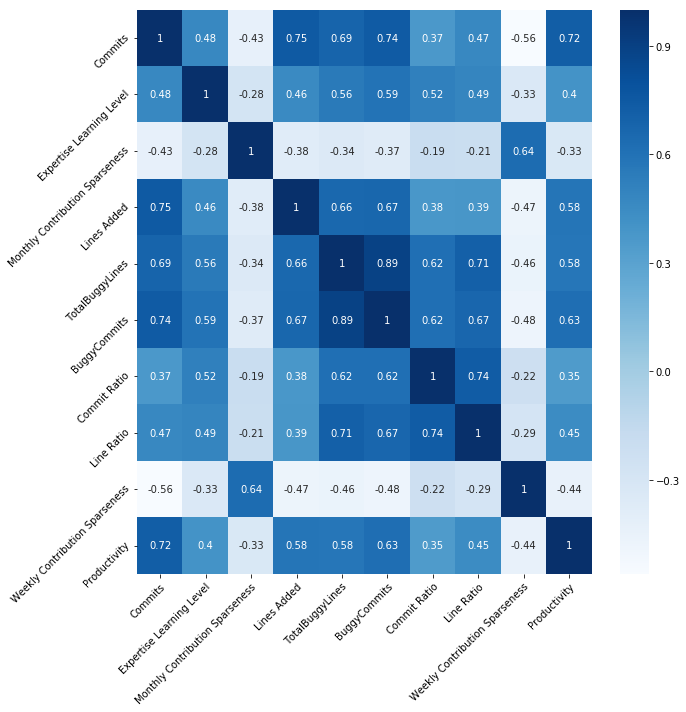

In [338]:
pt.figure(figsize=(10, 10))
snsPlot = sns.heatmap(commitMatrix.corr(method='kendall'), annot=True, cmap="Blues")
figure = snsPlot.get_figure() 
snsPlot.set_yticklabels(snsPlot.get_yticklabels(), rotation=45, rotation_mode='anchor', ha='right')
snsPlot.set_xticklabels(snsPlot.get_xticklabels(), rotation=45, rotation_mode='anchor', ha='right')
snsPlot.figure.savefig("heatMap3.png", bbox_index="tight", transparent=True)

/Users/faizank/workspace/jupyter/lib/python3.7/site-packages/matplotlib/figure.py:2369: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


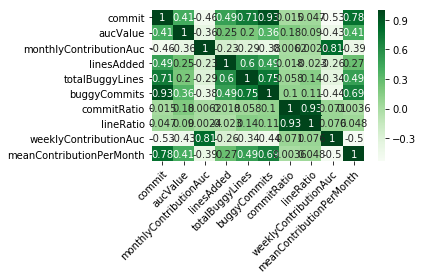

In [323]:
snsPlot = sns.heatmap(commitMatrix.corr(), cmap='Greens',annot=True)
figure = snsPlot.get_figure()    

from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})
snsPlot.set_xticklabels(snsPlot.get_xticklabels(), rotation=45, rotation_mode='anchor', ha='right')
snsPlot.figure.savefig("heatMap3.png", bbox_index="tight", transparent=True)

In [324]:
classifiers = [
    svm.SVR(),
    linear_model.SGDRegressor(),
    linear_model.BayesianRidge(),
    linear_model.LassoLars(),
    linear_model.ARDRegression(),
    linear_model.PassiveAggressiveRegressor(),
    linear_model.TheilSenRegressor(),
    linear_model.LinearRegression()]
# filteredMatrix = commitMatrix[commitMatrix.commit]
# pt.scatter(filteredMatrix.commit, filteredMatrix.aucValue)
X=np.array(commitMatrix.drop(['aucValue'],1))
y= commitMatrix.aucValue

In [325]:
# X= preprocessing.scale(X)
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2)

for c in classifiers:
    clf = c
    clf.fit(X_train, y_train)
    accuracy = clf.score(X_test, y_test)
    print(accuracy)

# clf = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial').fit(X, y)

/Users/faizank/workspace/jupyter/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/faizank/workspace/jupyter/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDRegressor in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


0.06639253831960301
-5.194624648264334e+38
0.26094270408338294
-0.06344722501784683
0.26204041634472375
-0.258161390654851


/Users/faizank/workspace/jupyter/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in PassiveAggressiveRegressor in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


-0.37234250436694283
0.28529088878546516


In [326]:
y_predict = clf.predict(X_test)
print(y_predict)

[ 0.44156175  0.42795579  0.24995908  0.15172459  0.21592402  0.12416689
  0.18225937 -0.03402315 -0.0103561   0.18481743  0.31758637  0.24653968
  0.17686294  0.23400115  0.10697071  0.37226978  0.31223489  0.22639567
  0.14379525  0.28893561  0.61745134  0.34863353  0.33105603 -0.03315927]


In [327]:
from sklearn.metrics import r2_score
r2_score(y_test, y_predict)

0.28529088878546516

(array([100.,   7.,   3.,   0.,   1.,   1.,   1.,   0.,   1.,   2.,   0.,
          0.,   0.,   1.,   1.]),
 array([   0.        ,   72.46666667,  144.93333333,  217.4       ,
         289.86666667,  362.33333333,  434.8       ,  507.26666667,
         579.73333333,  652.2       ,  724.66666667,  797.13333333,
         869.6       ,  942.06666667, 1014.53333333, 1087.        ]),
 <a list of 15 Patch objects>)

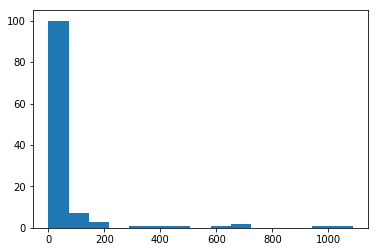

In [253]:
pt.hist(commitMatrix.totalBuggyLines, bins=15)

(array([80., 29.,  4.,  2.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  2.]),
 array([0.        , 0.06666667, 0.13333333, 0.2       , 0.26666667,
        0.33333333, 0.4       , 0.46666667, 0.53333333, 0.6       ,
        0.66666667, 0.73333333, 0.8       , 0.86666667, 0.93333333,
        1.        ]),
 <a list of 15 Patch objects>)

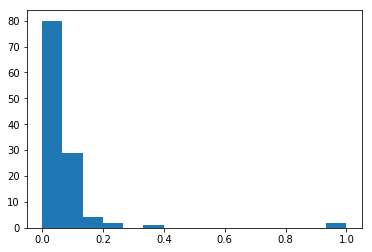

In [254]:
pt.hist(commitMatrix.commitRatio, bins=15)

(array([100.,  10.,   5.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   1.,   0.,   1.]),
 array([0.        , 0.00412371, 0.00824742, 0.01237113, 0.01649485,
        0.02061856, 0.02474227, 0.02886598, 0.03298969, 0.0371134 ,
        0.04123711, 0.04536082, 0.04948454, 0.05360825, 0.05773196,
        0.06185567]),
 <a list of 15 Patch objects>)

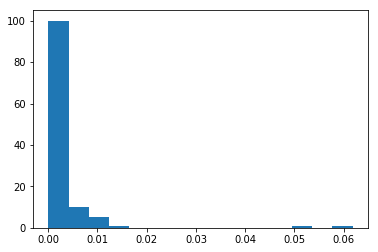

In [255]:
pt.hist(commitMatrix.lineRatio, bins=15)